## Import the important Packages

In [1]:
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.impute import KNNImputer
import os



In [2]:
file_path=r"C:\Data-Files\Loan_data.csv"
loan_df=pd.read_csv(file_path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


**Catagorical columns**

In [3]:
cat=loan_df.select_dtypes(include='object').columns
cat

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Numerical columns**

In [4]:
num=loan_df.select_dtypes(exclude='object').columns
num

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

## Data Quick Check

In [5]:
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan_df.shape

(614, 13)

In [7]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan_df.size

7982

In [9]:
loan_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [10]:
loan_df.tail(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [11]:
loan_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

**Checking dtypes of all columns**

In [12]:
loan_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Data preprocessing

In [13]:
labels=loan_df['Dependents'].unique().tolist()
d={}
for i,j in enumerate(labels):
    d[j]=i
loan_df['Dependents']=loan_df['Dependents'].map(d) 

In [14]:
d

{'0': 0, '1': 1, '2': 2, '3+': 3, nan: 4}

**Droping unwanted columns**

In [15]:
loan_df.drop(columns=['Loan_ID'],inplace=True)


In [16]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Handeling the missing Values

**checking missing persentage**

In [17]:
missing_pct = loan_df.isnull().mean() * 100
missing_pct

Gender               2.117264
Married              0.488599
Dependents           0.000000
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

**count of total nummber of null values in the columns**

In [18]:
for i in loan_df.columns.tolist():
    print(i,':',loan_df[i].isnull().sum())

Gender : 13
Married : 3
Dependents : 0
Education : 0
Self_Employed : 32
ApplicantIncome : 0
CoapplicantIncome : 0
LoanAmount : 22
Loan_Amount_Term : 14
Credit_History : 50
Property_Area : 0
Loan_Status : 0


**Checking null values are present or not**

In [19]:
con=loan_df.isnull().sum()
con

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Null handeling for num columns**

In [20]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2,weights='uniform')
loan_df[['Dependents','Loan_Amount_Term','LoanAmount']]=imputer.fit_transform(loan_df[['Dependents','Loan_Amount_Term','LoanAmount']])

**Null handeling for cat columns**

In [21]:
null_cat_cols=['Gender','Married','Self_Employed']
for col in null_cat_cols:
    loan_df[col] = loan_df[col].fillna(loan_df[col].mode()[0])


**Even though Credit_History is stored as a float as it count as numrical columns , you should treat it as a Categorical variable**
**If most people in your data have a credit history (1.0), it is statistically safer to assume a missing value is also a 1.0 rather than a decimal like 0.84**

In [22]:
loan_df['Credit_History'] = loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0])

**Rechecking Missing value persentage for every columns**

In [23]:
missing_pct = loan_df.isnull().mean() * 100
missing_pct

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## Categorical columns Analysis 

**Frequency Table**

In [24]:
cat=loan_df.select_dtypes(include='object').columns

freq_folder = 'Categorical_Frequency_Tables'
os.makedirs(freq_folder,exist_ok=True)
new_dir1=os.getcwd()
new_dir2=os.path.join(new_dir1,freq_folder)

plt.figure(figsize=(12,6))
for i,j in enumerate(cat):
    
    series=loan_df[j].value_counts()
    FT = series.reset_index()
    FT.columns = [j, 'Frequency']

    file_name=f'{j}_Frequency_Table.csv'
    path=os.path.join(new_dir2,file_name)
    FT.to_csv(path,index=False)

<Figure size 1200x600 with 0 Axes>

**Bar Chart**

<Figure size 1400x700 with 0 Axes>

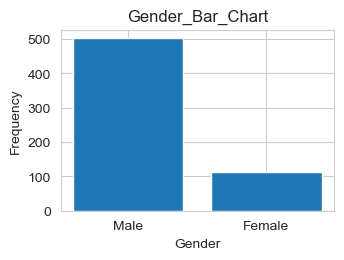

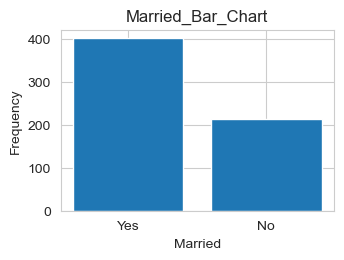

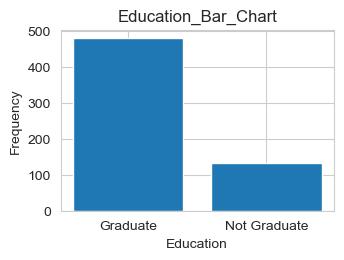

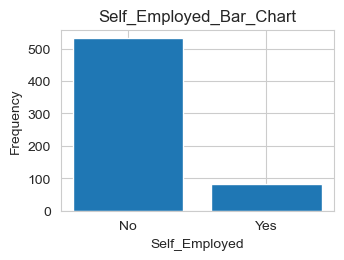

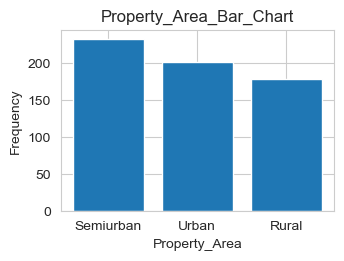

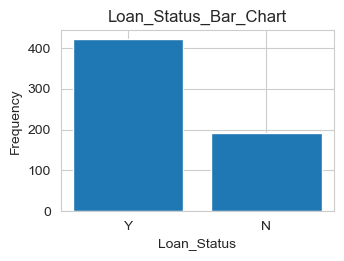

In [25]:
cat=loan_df.select_dtypes(include='object').columns

bar_folder = 'Loan_Data_Bar_Charts'
os.makedirs(bar_folder,exist_ok=True)
new_dir3=os.getcwd()
new_dir4=os.path.join(new_dir3,bar_folder)

plt.figure(figsize=(14,7))
sns.set_style("whitegrid")
for i,j in enumerate(cat):
    
    series=loan_df[j].value_counts()
    FT = series.reset_index()
    FT.columns = [j, 'Frequency']

    keys=series.keys()
    values=series.values
    plt.figure(figsize=(12,8))
    plt.subplot(3,3,i+1).bar(keys,values)
    plt.title(f'{j}_Bar_Chart')
    plt.xlabel(j)
    plt.ylabel('Frequency')
    filename=f'{j}_Bar_Chart.png'
    path=os.path.join(new_dir4,filename)
    plt.savefig(path)

    

**Pie Chart**

<Figure size 900x1200 with 0 Axes>

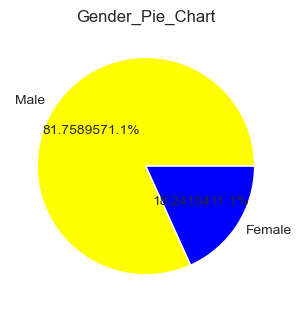

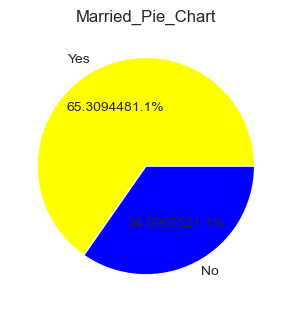

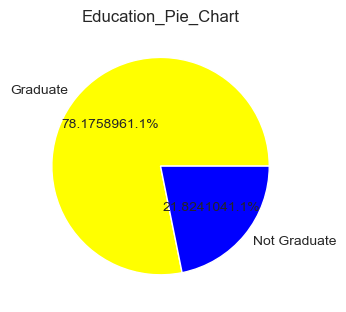

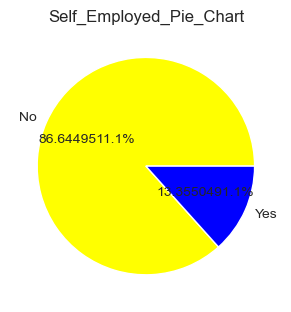

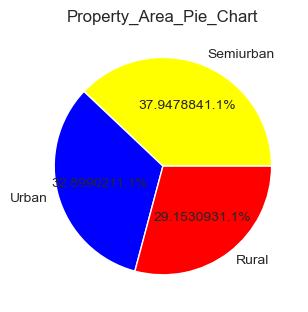

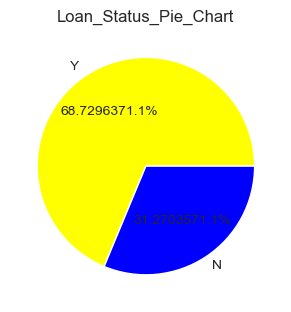

In [26]:
cat=loan_df.select_dtypes(include='object').columns

Pie_folder = 'Loan_Data_Pie_Charts'
os.makedirs(Pie_folder,exist_ok=True)
new_dir5=os.getcwd()
new_dir6=os.path.join(new_dir5,Pie_folder)

plt.figure(figsize=(9,12))

for i,j in enumerate(cat):
    series=loan_df[j].value_counts()
    keys=series.keys()
    values=series.values
    plt.figure(figsize=(9,12))
    plt.subplot(3,2,i+1).pie(values,labels=keys,autopct='%f1.1%%',colors=['yellow','blue','red'])
    plt.title(f'{j}_Pie_Chart')

    filename=f'{j}_Pie_Chart.png'
    path=os.path.join(new_dir6,filename)
    plt.savefig(path)
    

## Categorical vs Target 

<Figure size 800x1200 with 0 Axes>

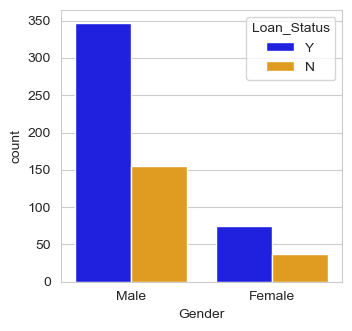

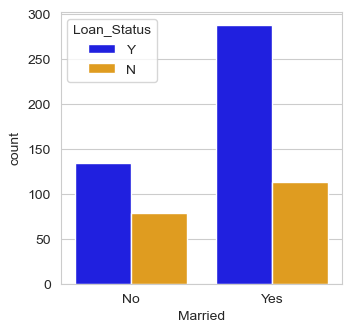

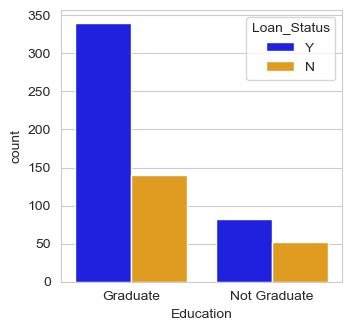

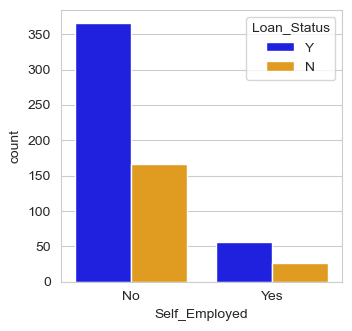

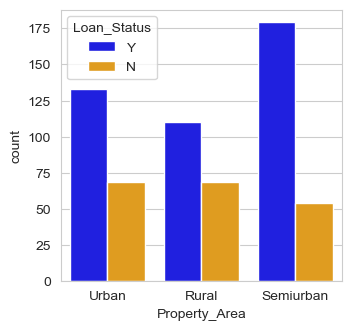

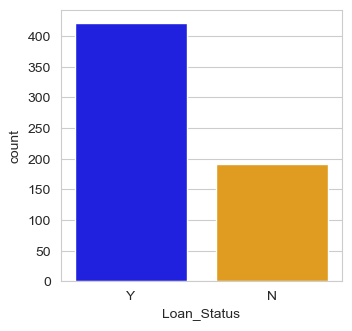

In [27]:

Countplot_folder = 'Loan_Data_Categorical_vs_Target'
os.makedirs(Countplot_folder,exist_ok=True)
new_dir7=os.getcwd()
new_dir8=os.path.join(new_dir7,Countplot_folder)

plt.figure(figsize=(8,12))
for i,j in enumerate(cat):
    plt.figure(figsize=(8,12))
    plt.subplot(3,2,i+1)
    sns.countplot(data=loan_df,x=j,hue='Loan_Status',palette=['blue','orange'])



    filename=f'{j}_count_plot.png'
    path=os.path.join(new_dir8,filename)
    plt.savefig(path)


 ## Numerical columns Analysis

In [28]:
num=loan_df.select_dtypes(exclude='object').columns
num

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [29]:
num_df=loan_df[num]
num_df.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,5849,0.0,112.0,360.0,1.0
1,1.0,4583,1508.0,128.0,360.0,1.0
2,0.0,3000,0.0,66.0,360.0,1.0


In [30]:
num_df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842020,5403.459283,1621.245798,146.139251,342.019544,0.855049
std,1.120531,6109.041673,2926.248369,84.570567,64.571063,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,126.000000,360.000000,1.000000
75%,2.000000,5795.000000,2297.250000,167.750000,360.000000,1.000000
max,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


**Histogram or KDEPLOT Of Numerical columns**

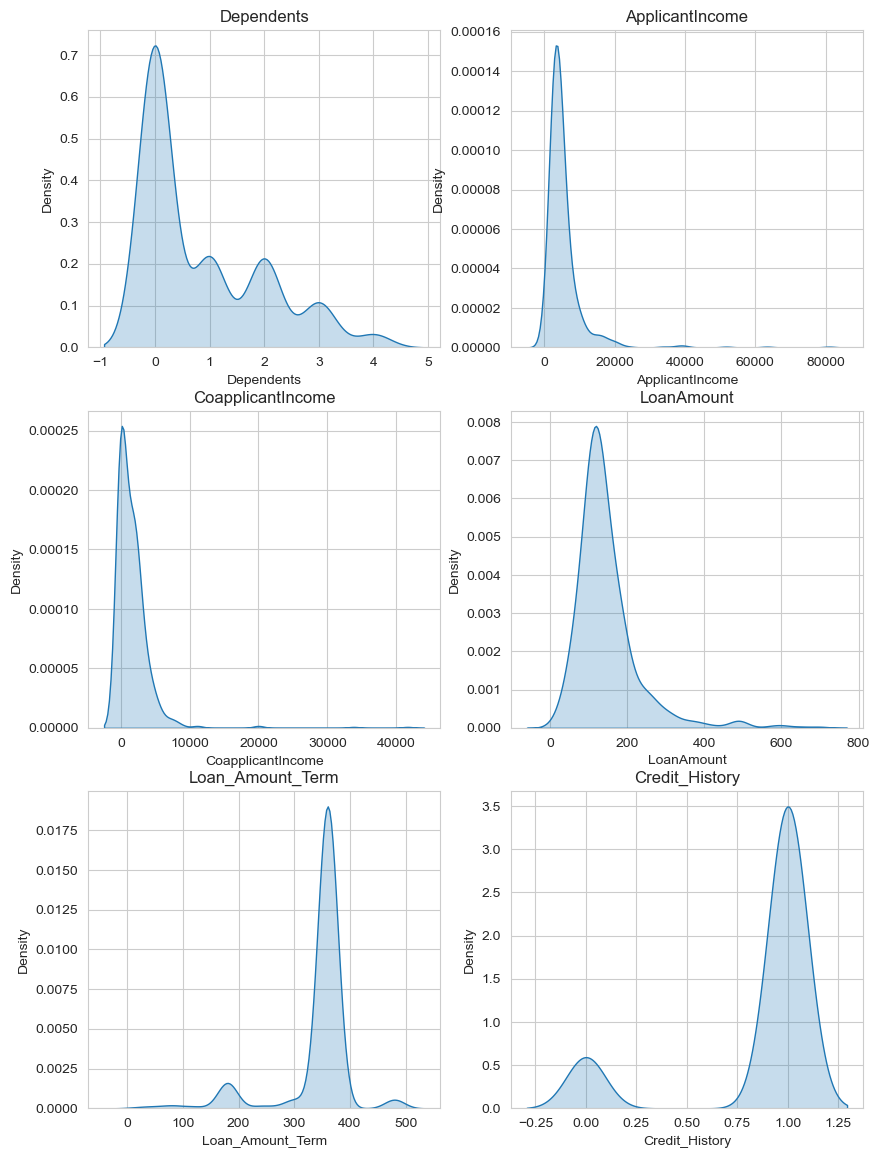

In [31]:
plt.figure(figsize=(10,14))
sns.set_style("whitegrid")
for i,j in enumerate(num):
    #plt.subplot(3,2,i+1).hist(loan_df[j])
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=loan_df,x=j,fill=True)
    plt.title(f'{j}')

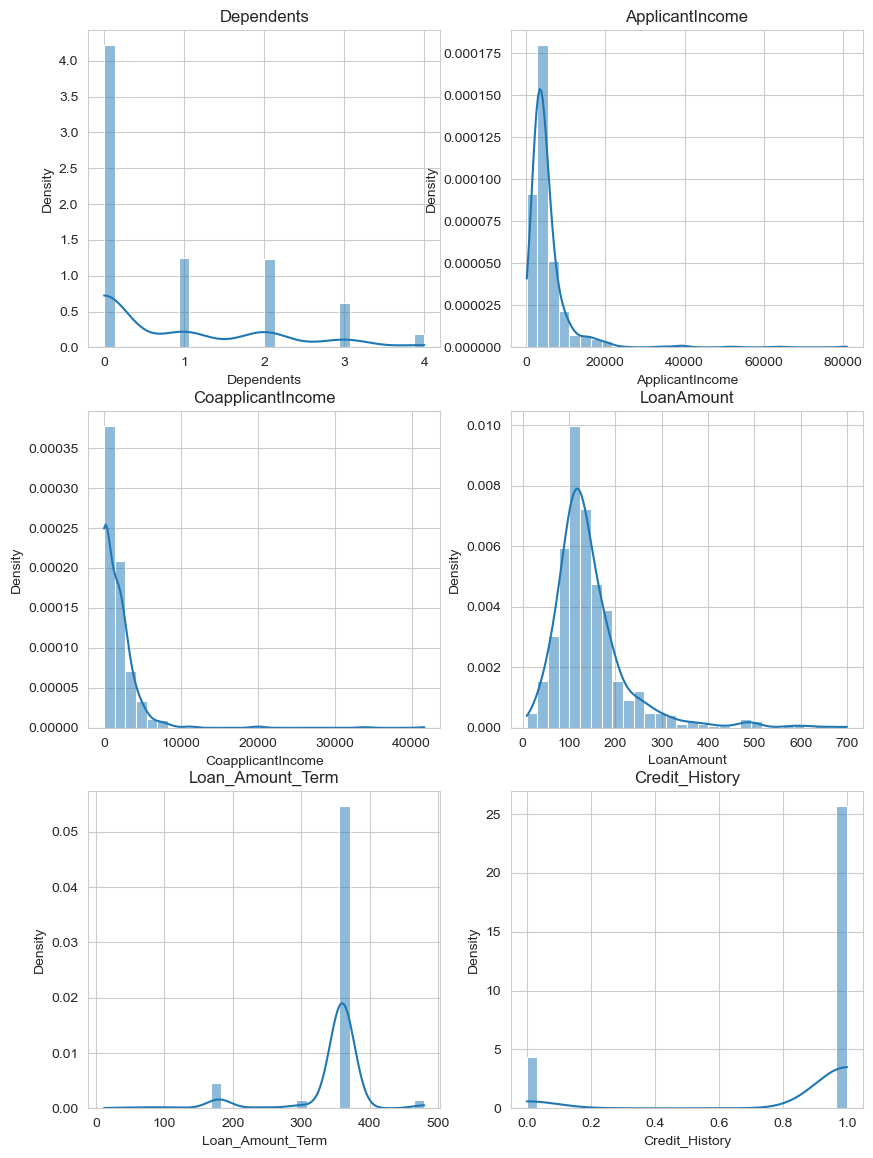

In [32]:
plt.figure(figsize=(10,14))
for i,j in enumerate(num):
    plt.subplot(3,2,i+1)
    sns.histplot(
    data=loan_df,
    x=j,
    bins=30,
    kde=True,
    stat="density"
    )
    plt.title(f'{j}')


# Numerical vs Target

<Figure size 1000x1400 with 0 Axes>

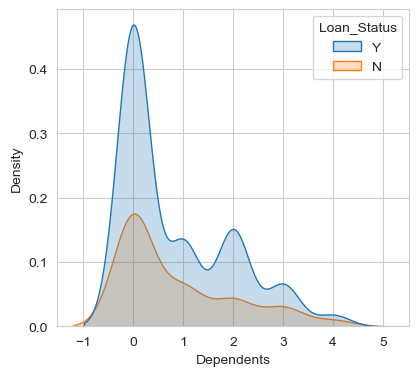

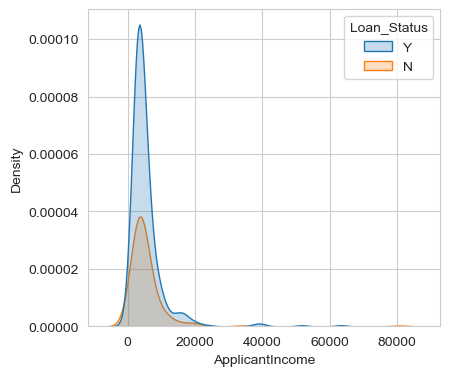

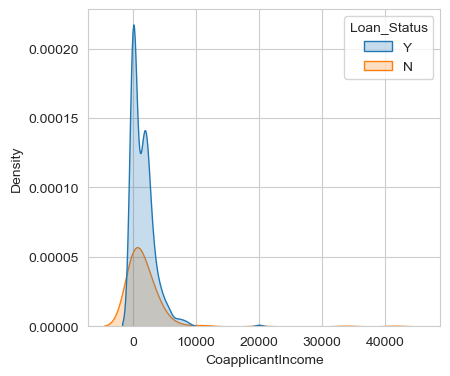

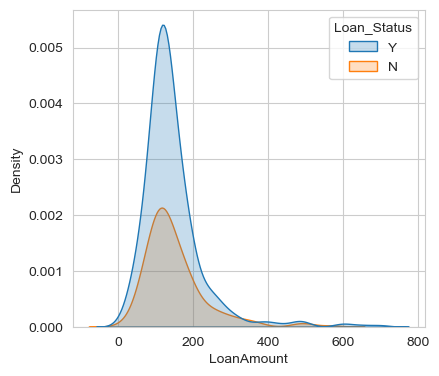

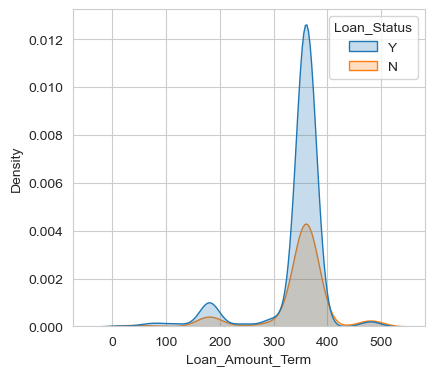

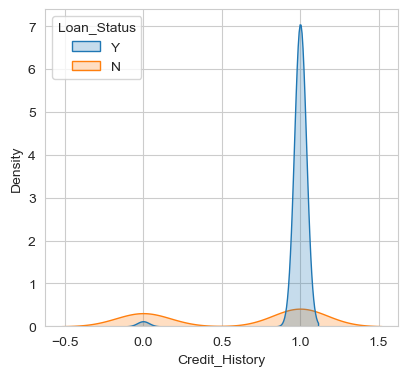

In [33]:
KDEPLOT_folder = 'Loan_Data_Numerical_vs_Target'
os.makedirs(KDEPLOT_folder,exist_ok=True)
new_dir9=os.getcwd()
new_dir10=os.path.join(new_dir9,KDEPLOT_folder)

plt.figure(figsize=(10,14))
for i,j in enumerate(num):
    plt.figure(figsize=(10,14))
    plt.subplot(3,2,i+1)
    sns.kdeplot(data=loan_df, x=j, hue='Loan_Status', fill=True)

    filename=f'{j}_count_plot.png'
    path=os.path.join(new_dir10,filename)
    plt.savefig(path)



**Box Plot of numerical columns**

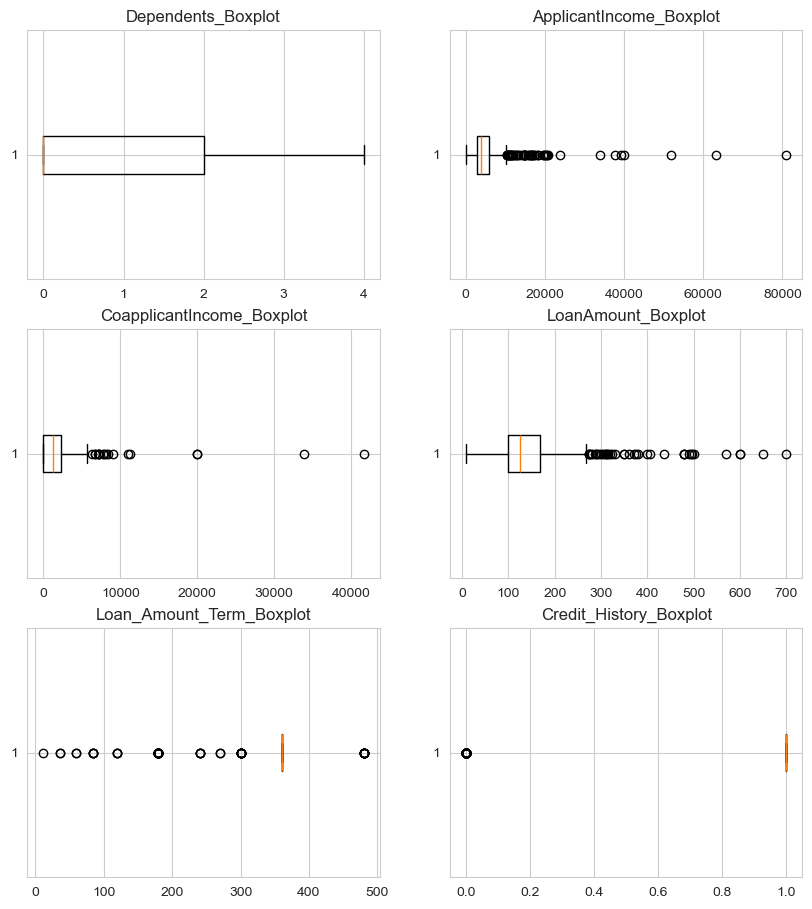

In [34]:
plt.figure(figsize=(10,11))
for i,j in enumerate(num):
    plt.subplot(3,2,i+1).boxplot(loan_df[j],vert=False)
    plt.title(f'{j}_Boxplot')

**From the above Boxplot we get known that there are several outliers are there in the data so we have to handele it**

## Outliers Analysis

In [35]:
outlier_counts = {}
for i in num:
    data=loan_df[i]
    
    q1=np.percentile(data,25)
    q2=np.percentile(data,50)
    q3=np.percentile(data,75)
    
    iqr=q3-q1
    
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    
    con1=data<lb
    con2=data>ub
    
    con=con1 | con2
    
    outliers=data[con].values.tolist()
    outlier_counts[i]=con.sum()


    

**Number of outliers per columns**

In [36]:
outlier_counts

{'Dependents': np.int64(0),
 'ApplicantIncome': np.int64(50),
 'CoapplicantIncome': np.int64(18),
 'LoanAmount': np.int64(39),
 'Loan_Amount_Term': np.int64(91),
 'Credit_History': np.int64(89)}

**Total Outliers**

In [37]:
No_Of_Outliers=sum(outlier_counts.values())
No_Of_Outliers

np.int64(287)

## Impute the outliers by using winsorization

In [38]:
for i in  num:
    data=loan_df[i]
    q1=np.percentile(data,25)
    q3=np.percentile(data,75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    loan_df[i]=np.clip(data,lb,ub)

## Rechecking the outliers using box plot

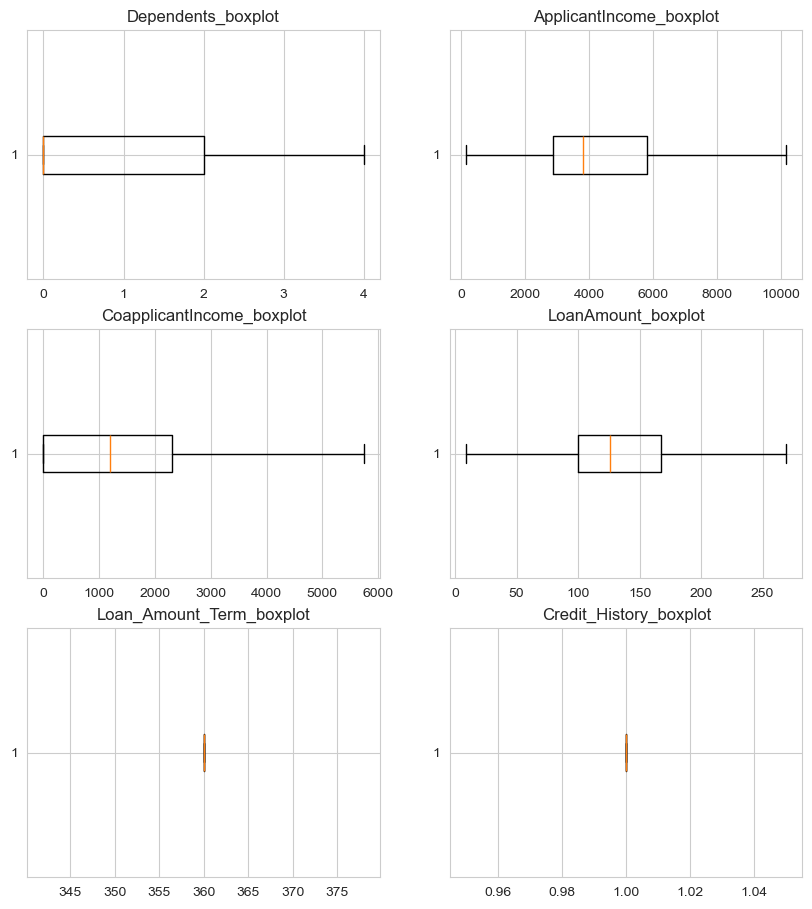

In [39]:
plt.figure(figsize=(10,11))
for i,j in enumerate(num):
    data=loan_df[j]
    plt.subplot(3,2,i+1).boxplot(data,vert=False)
    plt.title(f'{j}_boxplot')

## Find the correlation between numerical columns

In [40]:
corr_data=loan_df.corr(numeric_only=True)


**Heat map**

<Axes: >

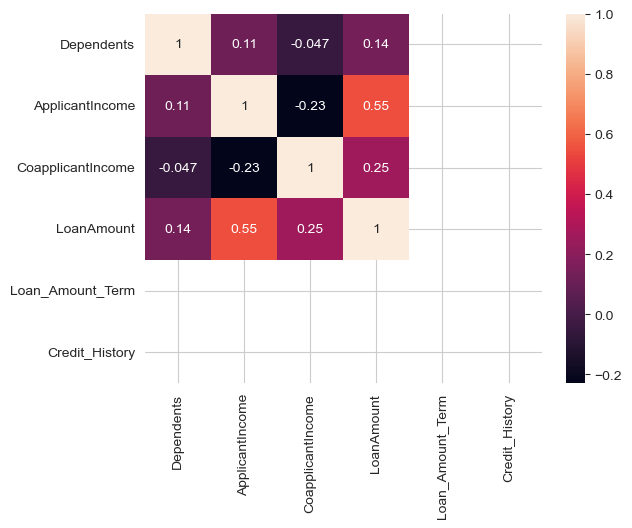

In [41]:
sns.heatmap(corr_data,annot=True)

## Check if there are constant values in tha num data colums ['Loan_Amount_Term', 'Credit_History']

**A constant column (only one unique value) provides zero information. so you have to drop them**

In [42]:
loan_df[['Loan_Amount_Term','Credit_History']].nunique()

Loan_Amount_Term    1
Credit_History      1
dtype: int64

In [43]:
loan_df.drop(columns=['Credit_History','Loan_Amount_Term'],inplace=True)

**Again plot the Heat Map**

<Axes: >

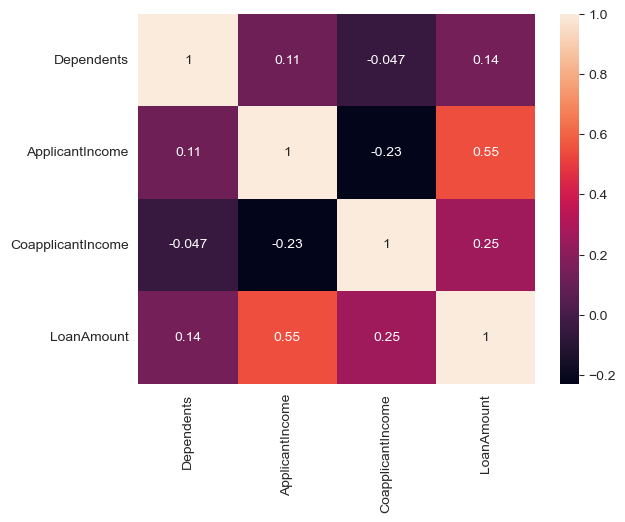

In [44]:
corr_data=loan_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)

## Convert all Catagorical columns to Numerical By using 'One_Hot Encoder'

In [45]:
cat

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [46]:
loan_df[cat]

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


In [47]:
for i in cat:
    loan_df=pd.get_dummies(loan_df,dtype=int)
   

In [48]:
loan_df


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0.0,5849.0,0.0,112.0,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1.0,4583.0,1508.0,128.0,0,1,0,1,1,0,1,0,1,0,0,1,0
2,0.0,3000.0,0.0,66.0,0,1,0,1,1,0,0,1,0,0,1,0,1
3,0.0,2583.0,2358.0,120.0,0,1,0,1,0,1,1,0,0,0,1,0,1
4,0.0,6000.0,0.0,141.0,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900.0,0.0,71.0,1,0,1,0,1,0,1,0,1,0,0,0,1
610,3.0,4106.0,0.0,40.0,0,1,0,1,1,0,1,0,1,0,0,0,1
611,1.0,8072.0,240.0,253.0,0,1,0,1,1,0,1,0,0,0,1,0,1
612,2.0,7583.0,0.0,187.0,0,1,0,1,1,0,1,0,0,0,1,0,1


## Separate again new Catagorical columns and Numerical columns

- Because you have drop some columns and have applied one-hot encoding which has
changed the cat data

In [49]:
cat = loan_df.select_dtypes(include='object').columns
num = loan_df.select_dtypes(exclude='object').columns

In [50]:
cat

Index([], dtype='object')

In [51]:
num

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

## Scaling tha Data

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
for i in num:
    scale_data=ss.fit_transform(loan_df[[i]])
    loan_df[i]=scale_data
    

In [53]:
loan_df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,-0.752060,0.497164,-0.874587,-0.455739,-0.472343,0.472343,1.372089,-1.372089,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147,-0.674519,0.674519
1,0.141102,-0.013767,0.054395,-0.178138,-0.472343,0.472343,-0.728816,0.728816,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208,1.482537,-1.482537
2,-0.752060,-0.652632,-0.874587,-1.253840,-0.472343,0.472343,-0.728816,0.728816,0.528362,-0.528362,-2.547117,2.547117,-0.641478,-0.782016,1.428147,-0.674519,0.674519
3,-0.752060,-0.820924,0.578025,-0.316938,-0.472343,0.472343,-0.728816,0.728816,-1.892641,1.892641,0.392601,-0.392601,-0.641478,-0.782016,1.428147,-0.674519,0.674519
4,-0.752060,0.558104,-0.874587,0.047412,-0.472343,0.472343,1.372089,-1.372089,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147,-0.674519,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.752060,-0.692990,-0.874587,-1.167090,2.117107,-2.117107,1.372089,-1.372089,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208,-0.674519,0.674519
610,1.927426,-0.206274,-0.874587,-1.704941,-0.472343,0.472343,-0.728816,0.728816,0.528362,-0.528362,0.392601,-0.392601,1.558899,-0.782016,-0.700208,-0.674519,0.674519
611,0.141102,1.394319,-0.726739,1.990616,-0.472343,0.472343,-0.728816,0.728816,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147,-0.674519,0.674519
612,1.034264,1.196969,-0.874587,0.845514,-0.472343,0.472343,-0.728816,0.728816,0.528362,-0.528362,0.392601,-0.392601,-0.641478,-0.782016,1.428147,-0.674519,0.674519
